# How to remove common systematics from Kepler light curves using the `KeplerCBVCorrector`?

Cotrending Basis Vectors are generated in the PDC component of the pipeline and are used to remove systematic trends in light curves. They are built from the most common systematic trends observed in each channel. You can read more about CBVs in [Demystifying Kepler Data](https://arxiv.org/pdf/1207.3093.pdf). They can be used to clean lightcurves of common trends experienced by all targets.

PDC utilizes these CBVs and gennerally performs excellently on most stars, but it must operate automatically on all stars on the CCD output simultaneously and will not always perform ideally for every star. If PDC did not generate the light curve you desire, you can use the CBV's to perform your own correction.

Below is an example workflow to remove CBVs from an light curve in Kepler; [Tabby's star](https://en.wikipedia.org/wiki/KIC_8462852). First, lets see how PDC did at removing the systematics for this star.

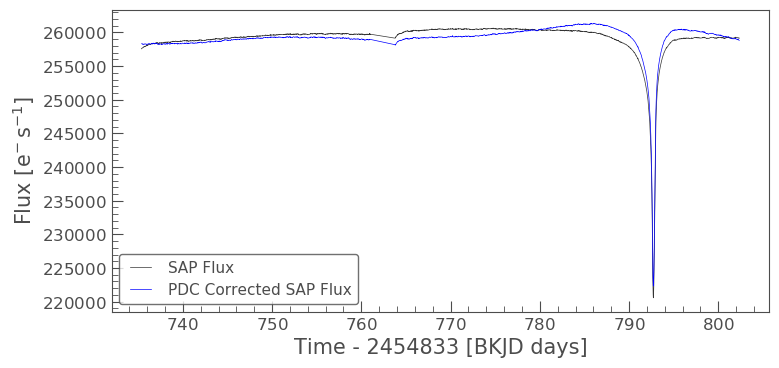

In [1]:
from lightkurve import search_lightcurvefile
lcf = search_lightcurvefile('KIC 8462852', quarter=8).download()
lc = lcf.SAP_FLUX 
lcPDC = lcf.PDCSAP_FLUX

%matplotlib inline
ax = lc.plot(label='SAP Flux', linestyle='-');
lcPDC.plot(ax=ax, color='blue', label='PDC Corrected SAP Flux', linestyle='-');

The SAP light curve above has a significant dip due to the astrophysical variability from Tabby's star. However there are other long term trends and small ramps due to heating and other effects from the spacecraft, which we would like to remove. But PDC appears to have not performed well at removing these systematics for this particular star. Let's import the CBV corrector from `lightkurve` and perform our own correction.

In [2]:
from lightkurve.correctors import KeplerCBVCorrector

We can use the `plot_cbvs` function to take a look at the trends we are going to remove. Let's look at just the first 8 trends.

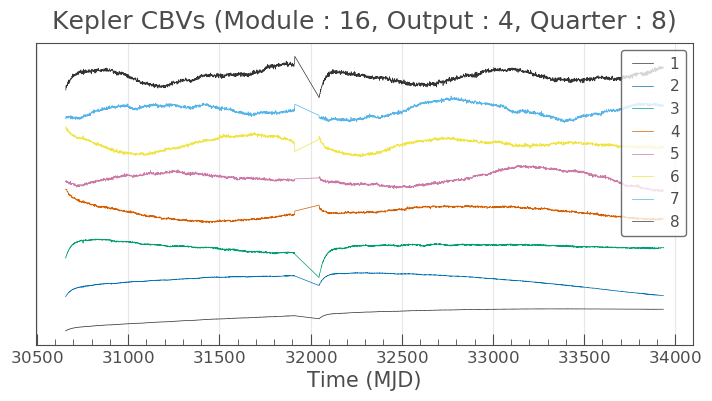

In [3]:
KeplerCBVCorrector(lcf).plot_cbvs([1,2,3,4,5,6,7,8]);

The high index CBVs generally contain higher amounts of noise. Using all basis vectors therefore runs the risk of introducing noise into the light curves (See [Overfitting](https://en.wikipedia.org/wiki/Overfitting)). We therefore probably don't want to jointly fit all these trends out of Tabby's star. Let's pick just the first 5.

In [4]:
corr_lc =  KeplerCBVCorrector(lcf).correct(cbvs=[1,2,3,4,5])

In [5]:
corr_lc

KeplerLightCurve(ID: 8462852)

We can plot the two light curves on the same plot window to see the difference.

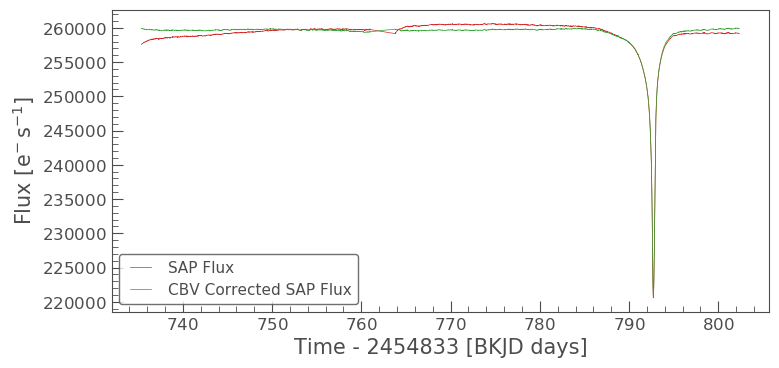

In [6]:
ax = lc.plot(color='C3', label='SAP Flux', linestyle='-')
corr_lc.plot(ax=ax, color='C2', label='CBV Corrected SAP Flux', linestyle='-');

Now that looks much better! The CBVs appears to have removed the instrumental systematics and only the astrophysical variability looks to be left. Of course, there is no guarantee only the systematics will be removed or that no noise will be introduced into the light curve when performing a sytematic error correction. The reader is advised to have a healthy amount of skepticism with any processed light curve!